# Project Description
The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim of this data science project is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.

The data has missing values as some stores do not report all the data due to technical glitches. Hence, it will be required to treat them accordingly.

# The Hypothesis

# # Store Level Hypotheses:
- City type: Stores located in urban or Tier 1 cities should have higher sales because of the higher income levels of people there.
- Population Density: Stores located in densely populated areas should have higher sales because of more demand.
- Store Capacity: Stores which are very big in size should have higher sales as they act like one-stop-shops and people would prefer getting everything from one place
- Competitors: Stores having similar establishments nearby should have less sales because of more competition.
- Marketing: Stores which have a good marketing division should have higher sales as it will be able to attract customers through the right offers and advertising.
- Location: Stores located within popular marketplaces should have higher sales because of better access to customers.
- Customer Behavior: Stores keeping the right set of products to meet the local needs of customers will have higher sales.
- Ambiance: Stores which are well-maintained and managed by polite and humble people are expected to have higher footfall and thus higher sales.

# Product Level Hypotheses:
- Brand: Branded products should have higher sales because of higher trust in the customer.
- Packaging: Products with good packaging can attract customers and sell more.
- Utility: Daily use products should have a higher tendency to sell as compared to the specific use products.
- Display Area: Products which are given bigger shelves in the store are likely to catch attention first and sell more.
- Visibility in Store: The location of product in a store will impact sales. Ones which are right at entrance will catch the eye of customer first rather than the ones in back.
- Advertising: Better advertising of products in the store will should higher sales in most cases.
- Promotional Offers: Products accompanied with attractive offers and discounts will sell more.

# Importing Libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

In [2]:
#Read files:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
train['source']='train'
test['source']='test'
df = pd.concat([train,test],ignore_index=True)
print(train.shape,test.shape,df.shape)

(8523, 13) (5681, 12) (14204, 13)


In [4]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


In [5]:
df.shape

(14204, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  source                     14204 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usag

In [7]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

In [8]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'source'],
      dtype='object')

# Exploratory Data Analysis
As we can observe, all the column names are listed in the output.

Item_Identifier column is referenced as Unique Product ID.The remaining columns appear to be our features, with the last column being the response variable.
- Item_Weight: Represents the weight of the product in floating values.  
- Item_Fat_Content: Categorical Data which tells whether the product is low fat or not.
- Item_Visibility: The percentage of total display area all the products in a store.
- Item_Type: The Category to which the product belongs.
- Item_MRP: MRP of the products.
- Outlet_Identifier:Unique store ID.
- Outlet_Establishment_Year: Year in which the store was established.  
- Outlet_Size: Size of the Store.
- Outlet_Location_Type: Type of City the store is located. 
- Outlet_Type: Whether the store is a grocery sotre or a super market.
- Item_Outlet_Sales: The Sales of the product in a particular store.

In [9]:
# Displaying the Unique data for each column
df.nunique()

Item_Identifier               1559
Item_Weight                    415
Item_Fat_Content                 5
Item_Visibility              13006
Item_Type                       16
Item_MRP                      8052
Outlet_Identifier               10
Outlet_Establishment_Year        9
Outlet_Size                      3
Outlet_Location_Type             3
Outlet_Type                      4
Item_Outlet_Sales             3493
source                           2
dtype: int64

# Evaluating the Categorical Features

In [10]:
print('Frequency of Categories for varible Item ID')
id_counts = df['Item_Identifier'].value_counts()
id_counts.head()

Frequency of Categories for varible Item ID


NCS41    10
FDQ37    10
DRK35    10
NCO14    10
FDX48    10
Name: Item_Identifier, dtype: int64

In [11]:
print('Frequency of Categories for varible Item_Fat_Content')
df['Item_Fat_Content'].value_counts()

Frequency of Categories for varible Item_Fat_Content


Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [12]:
print('Frequency of Categories for varible Item_Type')
df['Item_Type'].value_counts()

Frequency of Categories for varible Item_Type


Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

In [13]:
Item_Type_and_fat_counts = df.groupby(["Item_Fat_Content","Item_Type"]).size()
print(Item_Type_and_fat_counts)

Item_Fat_Content  Item_Type            
LF                Baking Goods             27
                  Breads                   17
                  Breakfast                 3
                  Canned                   30
                  Dairy                    39
                                           ..
reg               Fruits and Vegetables    32
                  Meat                     15
                  Snack Foods              38
                  Soft Drinks               4
                  Starchy Foods             8
Length: 70, dtype: int64


In [14]:
print('Frequency of Categories for varible Outlet ID')
outlet_id_counts = df['Outlet_Identifier'].value_counts()
outlet_id_counts

Frequency of Categories for varible Outlet ID


OUT027    1559
OUT013    1553
OUT046    1550
OUT035    1550
OUT049    1550
OUT045    1548
OUT018    1546
OUT017    1543
OUT010     925
OUT019     880
Name: Outlet_Identifier, dtype: int64

In [15]:
print('Frequency of Categories for varible Outlet_Location_Type')
df['Outlet_Location_Type'].value_counts()

Frequency of Categories for varible Outlet_Location_Type


Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: int64

In [16]:
print('Frequency of Categories for varible Outlet_Size')
df['Outlet_Size'].value_counts()

Frequency of Categories for varible Outlet_Size


Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [17]:
print('Frequency of Categories for varible Outlet_Type')
df['Outlet_Type'].value_counts()

Frequency of Categories for varible Outlet_Type


Supermarket Type1    9294
Grocery Store        1805
Supermarket Type3    1559
Supermarket Type2    1546
Name: Outlet_Type, dtype: int64

In [18]:
Outlet_Location_Type_counts = df.groupby(["Outlet_Location_Type","Outlet_Identifier","Outlet_Type"]).size()
print(Outlet_Location_Type_counts)

Outlet_Location_Type  Outlet_Identifier  Outlet_Type      
Tier 1                OUT019             Grocery Store         880
                      OUT046             Supermarket Type1    1550
                      OUT049             Supermarket Type1    1550
Tier 2                OUT017             Supermarket Type1    1543
                      OUT035             Supermarket Type1    1550
                      OUT045             Supermarket Type1    1548
Tier 3                OUT010             Grocery Store         925
                      OUT013             Supermarket Type1    1553
                      OUT018             Supermarket Type2    1546
                      OUT027             Supermarket Type3    1559
dtype: int64


In [19]:
Outlet_Location_Type_counts = df.groupby(["Outlet_Type","Outlet_Size"]).size()
print(Outlet_Location_Type_counts)

Outlet_Type        Outlet_Size
Grocery Store      Small           880
Supermarket Type1  High           1553
                   Medium         1550
                   Small          3100
Supermarket Type2  Medium         1546
Supermarket Type3  Medium         1559
dtype: int64


# Visualizing the Relationship between Features and Response

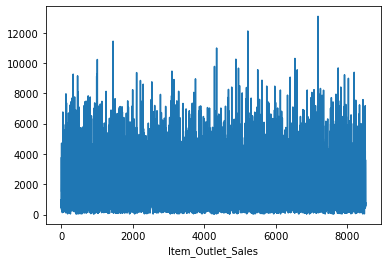

In [20]:
#This is a line plot to show the variation of the target variable across the dataset
import seaborn as sns
sns.lineplot(data = df['Item_Outlet_Sales'])
plt.xlabel('Item_Outlet_Sales')
plt.show()

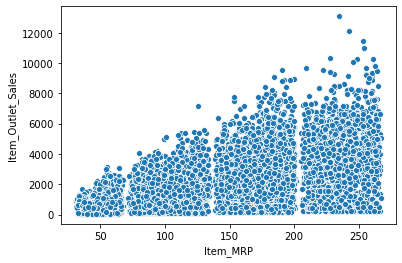

In [21]:
#This scatter plot show the variation of Item MRP vs Item Sales using scatter plot
sns.scatterplot(x = df['Item_MRP'], y = df['Item_Outlet_Sales'])
# plt.xlabel('Item_MRP')
# plt.ylabel('Item_Outlet_Sales')
plt.show()

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='Item_Outlet_Sales'>

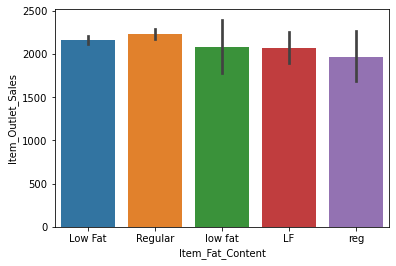

In [22]:
#This shows the variation of Item Fat Content vs Item Sales using bar plot
sns.barplot(x = df['Item_Fat_Content'],y = df['Item_Outlet_Sales'])

<AxesSubplot:xlabel='Item_Outlet_Sales'>

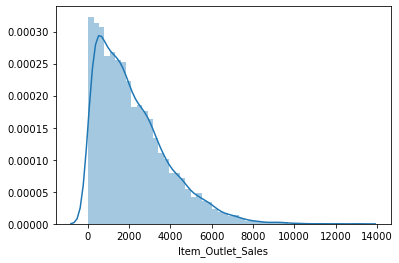

In [23]:
sns.distplot(a = df['Item_Outlet_Sales'])

<AxesSubplot:>

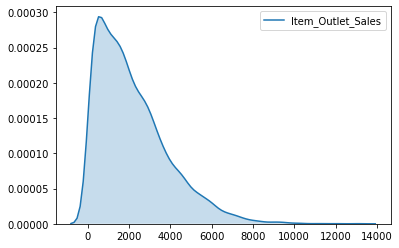

In [24]:
sns.kdeplot(data = df['Item_Outlet_Sales'], shade = True)

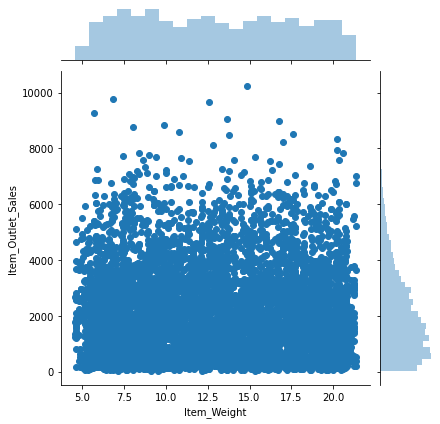

In [25]:
#A simple joint plot to visualize item MRP and outlet sales
sns.jointplot(x = df['Item_Weight'],y = df['Item_Outlet_Sales'])

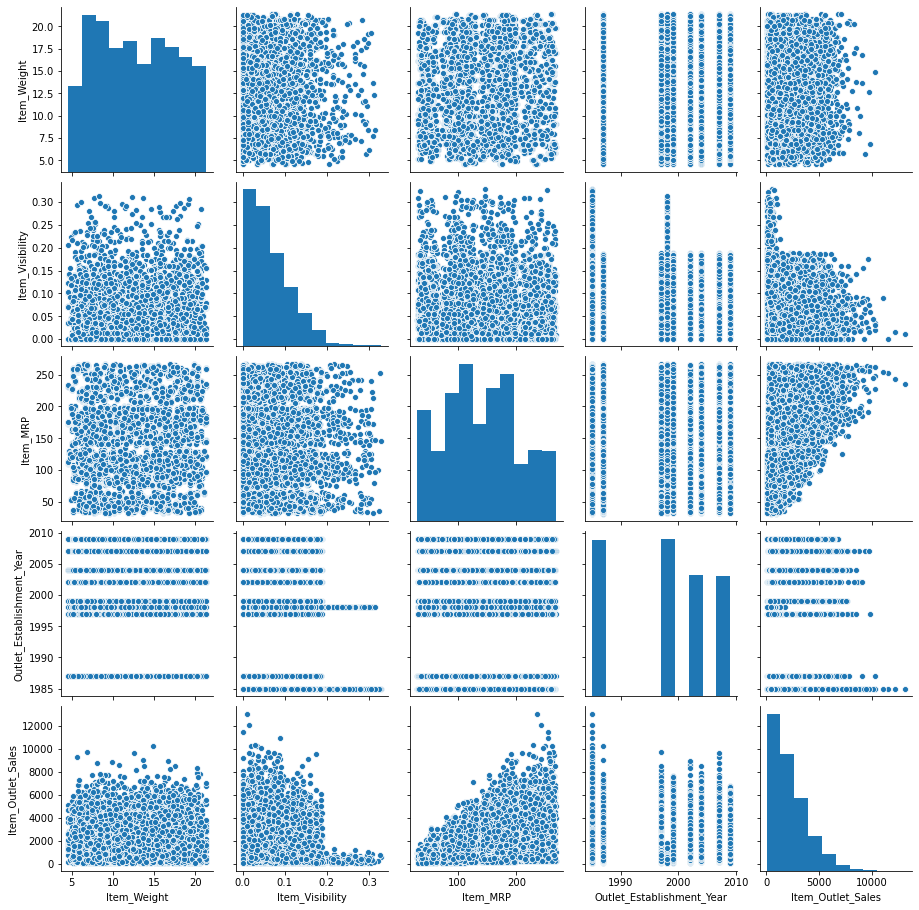

In [26]:
sns.pairplot(data = df)

In [27]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

# Handling Missing values
We found two variables with missing values – Item_Weight and Outlet_Size
_______________________________________________________________________________________________________________________________
#### Replacing the missing values of weight with the average weight of the same product

In [28]:
def impute_Item_Weight(df):
    """ This Function Replace the missing values of the Item_weight
    """
    # #Determine the average weight per item:
    item_avg_weight = df.groupby(["Item_Identifier"])["Item_Weight"].mean()
    item_avg_weight

    #Get a boolean variable specifying missing Item_Weight values
    miss_bool = df['Item_Weight'].isnull() 

    #Impute data and check #missing values before and after imputation to confirm
    print('Orignal #missing: %d'% sum(miss_bool))
    df.loc[miss_bool,'Item_Weight'] = df.loc[miss_bool,'Item_Identifier'].apply(lambda x: item_avg_weight.loc[x])
    print('Final #missing: %d'% sum(df['Item_Weight'].isnull()))
    
    return df

### Lets impute Outlet_Size with the mode of the Outlet_Size for the particular type of outlet.

In [29]:
#Import mode function:
from scipy.stats import mode

def impute_Outlet_size(df):
    """ This function replace the missing Outlet_size values
    """
    #Determing the mode for each
    outlet_size_mode = df.pivot_table(values='Outlet_Size', columns='Outlet_Type',aggfunc=(lambda x:mode(x).mode[0]) )
    print('Mode for each Outlet_Type:')
    print(outlet_size_mode)

    #Get a boolean variable specifying missing Item_Weight values
    miss_bool = df['Outlet_Size'].isnull() 

    #Impute data and check #missing values before and after imputation to confirm
    print('\nOrignal #missing: %d'% sum(miss_bool))
    df.loc[miss_bool,'Outlet_Size'] = df.loc[miss_bool,'Outlet_Type'].apply(lambda x: outlet_size_mode[x])
    print('\nFinal #missing: %d'%sum(df['Outlet_Size'].isnull()))
    
    return df

# __________________________________________________________________

In [30]:
def Handling_missing_values(df):
    """ Handling the missing values
    """
    df = impute_Item_Weight(df)
    df = impute_Outlet_size(df)
    
    miss_after_bool = df['Item_Weight'].isnull() 
    df = df.loc[~miss_after_bool,:]
    
    return df

# ___

# Handling the Categorical Data
_______________________________________________________________________________________________________________________________
### Modify Item_Visibility
We noticed that the minimum value here is 0, which makes no practical sense.

In [31]:
def modify_item_visibility(df):
    #Determine average visibility of a product
    visibility_avg = df.pivot_table(values='Item_Visibility', index='Item_Identifier')

    #Impute 0 values with mean visibility of that product:
    miss_bool = (df['Item_Visibility'] == 0)

    print('Number of 0 values initially: %d'%sum(miss_bool))
    df.loc[miss_bool,'Item_Visibility'] = df.loc[miss_bool,'Item_Identifier'].apply(lambda x: visibility_avg.loc[x])
    print('Number of 0 values after modification: %d'%sum(df['Item_Visibility'] == 0))
    
    return df

In [32]:
df.groupby(["Item_Identifier","Item_Type"]).size()

Item_Identifier  Item_Type         
DRA12            Soft Drinks            9
DRA24            Soft Drinks           10
DRA59            Soft Drinks           10
DRB01            Soft Drinks            8
DRB13            Soft Drinks            9
                                       ..
NCZ30            Household             10
NCZ41            Health and Hygiene     8
NCZ42            Household             10
NCZ53            Health and Hygiene     9
NCZ54            Household             10
Length: 1559, dtype: int64

We can clearly observe that the First 2 characters of the Item ID is same for the One kind of Item Type. Example: DR is the code for Soft Drinks, NC is the code of Non- Consumable Products and FD is for Food products

### Create a broad category of Type of Item


In [33]:
def broad_item_type(df):
    #Get the first two characters of ID:
    df['Item_Type_Combined'] = df['Item_Identifier'].apply(lambda x: x[0:2])
    #Rename them to more intuitive categories:
    df['Item_Type_Combined'] = df['Item_Type_Combined'].map({'FD':'Food',
                                                                 'NC':'Non-Consumable',
                                                                 'DR':'Drinks'})
    print(df['Item_Type_Combined'].value_counts())
    
    return df

In [34]:
df.groupby(["Outlet_Establishment_Year","Outlet_Identifier","Outlet_Type","Outlet_Location_Type"])["Item_Outlet_Sales"].mean()

Outlet_Establishment_Year  Outlet_Identifier  Outlet_Type        Outlet_Location_Type
1985                       OUT019             Grocery Store      Tier 1                   340.329723
                           OUT027             Supermarket Type3  Tier 3                  3694.038558
1987                       OUT013             Supermarket Type1  Tier 3                  2298.995256
1997                       OUT046             Supermarket Type1  Tier 1                  2277.844267
1998                       OUT010             Grocery Store      Tier 3                   339.351662
1999                       OUT049             Supermarket Type1  Tier 1                  2348.354635
2002                       OUT045             Supermarket Type1  Tier 2                  2192.384798
2004                       OUT035             Supermarket Type1  Tier 2                  2438.841866
2007                       OUT017             Supermarket Type1  Tier 2                  2340.675263
2009 

In [35]:
def cal_outlet_year(df):
    """ Calculating the Outlet Year
    """
    #Years:
    df['Outlet_Years'] = 2013 - df['Outlet_Establishment_Year']
    print(df['Outlet_Years'].describe())
    
    return df

# Modify categories of Item_Fat_Content
We found typos and difference in representation in categories of Item_Fat_Content variable.

In [36]:
def modify_item_fat_content(df):
    #Change categories of low fat:
    print('Original Categories:')
    print(df['Item_Fat_Content'].value_counts())

    print('\nModified Categories:')
    df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF':'Low Fat',
                                                                 'reg':'Regular',
                                                                 'low fat':'Low Fat'})
    print(df['Item_Fat_Content'].value_counts())
    
    return df

### We have corrected the typos and the difference in representation but some non-consumables as well and a fat-content should not be specified for them. So we can also create a separate category for such kind of observations.

In [37]:
def non_consumable_category(df):
    #Mark non-consumables as separate category in low_fat:
    df.loc[df['Item_Type_Combined']=="Non-Consumable",'Item_Fat_Content'] = "Non-Edible"
    print(df['Item_Fat_Content'].value_counts())
    
    return df

# ______

In [38]:
def Handling_categorical_data(df):
    
    # Modify Item_Visibility
    df = modify_item_visibility(df)
    
    # Create a broad category of Type of Item
    df = broad_item_type(df)
    
    # Calculating the Outlet Year
    df = cal_outlet_year(df)
    
    # Modify categories of Item_Fat_Content
    df = modify_item_fat_content(df)
    
    # Mark non-consumables as separate category in low_fat
    df = non_consumable_category(df)
    
    return df 

# ___________

# Numerical and One-Hot Coding of Categorical variables 

In [39]:
df.nunique()

Item_Identifier               1559
Item_Weight                    415
Item_Fat_Content                 5
Item_Visibility              13006
Item_Type                       16
Item_MRP                      8052
Outlet_Identifier               10
Outlet_Establishment_Year        9
Outlet_Size                      3
Outlet_Location_Type             3
Outlet_Type                      4
Item_Outlet_Sales             3493
source                           2
dtype: int64

In [40]:
#Import library:
from sklearn.preprocessing import LabelEncoder

def label_encoding(df):
    le = LabelEncoder()
    #New variable for outlet
    df['Outlet'] = le.fit_transform(df['Outlet_Identifier'])
    df['Outlet']
    var_mod = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Type_Combined','Outlet_Type','Outlet']
    le = LabelEncoder()
    for i in var_mod:
        df[i] = le.fit_transform(df[i])
        
    return df    

In [41]:
def One_hot_encoding(df):
    #One Hot Coding:
    df = pd.get_dummies(df, columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type','Item_Type_Combined','Outlet'],drop_first = True)
    
    return df

# __________

In [42]:
def Encoding(df):
    
    # Label encoding
    df = label_encoding(df)
    
    # #One Hot Coding:
    df = One_hot_encoding(df)
    
    #Created a list remove_cols to remove those columns which doesn't required for Model Building
    remove_cols = [
        'Item_Identifier',
        'Item_Type',
        'Outlet_Identifier',
        'Outlet_Establishment_Year'
    ]
    df = df.drop(remove_cols,axis =1)
    
    return df

# _______ 

In [43]:
from sklearn.preprocessing import StandardScaler

def Standard_Scaler(df):
    
    sc = StandardScaler()
    cols = [ 
        'Item_Weight',
        'Item_Visibility',
        'Item_MRP',
        'Outlet_Years'
    ]
    df[cols]  =  sc.fit_transform(df[cols])
    
    return df

# Data Preprocessing

In [44]:
def Data_preprocessing(df):
    
    # Handling Missing Values
    df = Handling_missing_values(df)
    
    # Handling Categorical Data
    df = Handling_categorical_data(df)
    
    # Label and One Hot Encoding
    df = Encoding(df)
    
    # Standardize Data
    #df = Standard_Scaler(df)
    return df

# Training the Model

In [45]:
import xgboost
import pickle
def Model_training(X,y):
    
    # Parameter using Hyperparameter Optimisation
    model = xgboost.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.4, gamma=0.0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.25, max_delta_step=0, max_depth=15,
             min_child_weight=1, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)
    # Fitting the model 
    model.fit(X,y)
    
    filename = 'finalized_model.pkl'
    pickle.dump(model, open(filename, 'wb'))
    
    return model

# Prediction 

In [46]:
def Prediction(model,X):
    #Predicting the Test set results
    y_pred = model.predict(X)
    
    return y_pred

# Evaluation

In [47]:
from sklearn.metrics import r2_score,mean_squared_error

def Evaluation(model,y,y_pred):
    
    score = r2_score(y,y_pred)
    print("Score of Training:",100*score)
    print("RMSE : %.4g" % np.sqrt(mean_squared_error(y,y_pred)))

# Guide
- Data Preprocessing : Run -> Data_preprocessing(df) : Handling_missing_values,Handling Categorical Data,Label and One Hot Encoding,Standardize Data
- Training the Model : Run -> Model_training(X,y)
- For Prediction : Run -> Prediction(model,X)
- For Evaluation : Run -> Evaluation(model,y,y_pred)


# Training the Model On Training Dataset

In [48]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


In [49]:
df.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
14199,FDB58,10.5,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN,test
14200,FDD47,7.6,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN,test
14201,NCO17,10.0,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN,test
14202,FDJ26,15.3,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN,test
14203,FDU37,9.5,Regular,0.104720,Canned,79.7960,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN,test


In [50]:
df.shape

(14204, 13)

In [51]:
df = Data_preprocessing(df)

Orignal #missing: 2439
Final #missing: 0
Mode for each Outlet_Type:
Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  

Orignal #missing: 4016

Final #missing: 0
Number of 0 values initially: 879
Number of 0 values after modification: 0
Food              10201
Non-Consumable     2686
Drinks             1317
Name: Item_Type_Combined, dtype: int64
count    14204.000000
mean        15.169319
std          8.371664
min          4.000000
25%          9.000000
50%         14.000000
75%         26.000000
max         28.000000
Name: Outlet_Years, dtype: float64
Original Categories:
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

Modified Categories:
Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64
Low Fat       6499
Regular       5019
Non-Edible    2686
Name: Item_

In [52]:
df.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,source,Outlet_Years,Item_Fat_Content_1,Item_Fat_Content_2,Outlet_Location_Type_1,Outlet_Location_Type_2,...,Item_Type_Combined_2,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,9.30,0.016047,249.8092,3735.1380,train,14,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,5.92,0.019278,48.2692,443.4228,train,4,0,1,0,1,...,0,0,0,1,0,0,0,0,0,0
2,17.50,0.016760,141.6180,2097.2700,train,14,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,19.20,0.017834,182.0950,732.3800,train,15,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,8.93,0.009780,53.8614,994.7052,train,26,1,0,0,1,...,1,1,0,0,0,0,0,0,0,0


In [53]:
df.shape

(14204, 26)

In [54]:
#Divide into test and train:
train = df.loc[df['source']=="train"]
test = df.loc[df['source']=="test"]

#Drop unnecessary columns:
test.drop(['Item_Outlet_Sales','source'],axis=1,inplace=True)
train.drop(['source'],axis=1,inplace=True)

#Export files as modified versions:
train.to_csv("train_modified.csv",index=False)
test.to_csv("test_modified.csv",index=False)

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


### Training Data

In [55]:
#Read files:
df = pd.read_csv("train_modified.csv")
df.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Outlet_Years,Item_Fat_Content_1,Item_Fat_Content_2,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Size_1,...,Item_Type_Combined_2,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,9.30,0.016047,249.8092,3735.1380,14,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,5.92,0.019278,48.2692,443.4228,4,0,1,0,1,1,...,0,0,0,1,0,0,0,0,0,0
2,17.50,0.016760,141.6180,2097.2700,14,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,19.20,0.017834,182.0950,732.3800,15,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,8.93,0.009780,53.8614,994.7052,26,1,0,0,1,0,...,1,1,0,0,0,0,0,0,0,0


In [56]:
y = df.Item_Outlet_Sales.values
X = df.drop('Item_Outlet_Sales',axis = 1)

In [57]:
X.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Years',
       'Item_Fat_Content_1', 'Item_Fat_Content_2', 'Outlet_Location_Type_1',
       'Outlet_Location_Type_2', 'Outlet_Size_1', 'Outlet_Size_2',
       'Outlet_Type_1', 'Outlet_Type_2', 'Outlet_Type_3',
       'Item_Type_Combined_1', 'Item_Type_Combined_2', 'Outlet_1', 'Outlet_2',
       'Outlet_3', 'Outlet_4', 'Outlet_5', 'Outlet_6', 'Outlet_7', 'Outlet_8',
       'Outlet_9'],
      dtype='object')

In [58]:
model = Model_training(X,y)

In [59]:
y_pred = Prediction(model,X)

In [60]:
Evaluation(model,y,y_pred)

Score of Training: 99.34027780878182
RMSE : 138.6


# Testing the Model On Test set

In [61]:
#Read files:
test = pd.read_csv("test_modified.csv")
test.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Years,Item_Fat_Content_1,Item_Fat_Content_2,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Size_1,Outlet_Size_2,...,Item_Type_Combined_2,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,20.750,0.007565,107.8622,14,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,8.300,0.038428,87.3198,6,0,1,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0
2,14.600,0.099575,241.7538,15,1,0,0,1,0,1,...,1,0,0,0,0,0,0,0,0,0
3,7.315,0.015388,155.0340,6,0,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0
4,13.600,0.118599,234.2300,28,0,1,0,1,1,0,...,0,0,0,0,0,1,0,0,0,0


In [62]:
test.shape

(5681, 24)

In [63]:
test.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Years',
       'Item_Fat_Content_1', 'Item_Fat_Content_2', 'Outlet_Location_Type_1',
       'Outlet_Location_Type_2', 'Outlet_Size_1', 'Outlet_Size_2',
       'Outlet_Type_1', 'Outlet_Type_2', 'Outlet_Type_3',
       'Item_Type_Combined_1', 'Item_Type_Combined_2', 'Outlet_1', 'Outlet_2',
       'Outlet_3', 'Outlet_4', 'Outlet_5', 'Outlet_6', 'Outlet_7', 'Outlet_8',
       'Outlet_9'],
      dtype='object')

In [64]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Item_Weight             5681 non-null   float64
 1   Item_Visibility         5681 non-null   float64
 2   Item_MRP                5681 non-null   float64
 3   Outlet_Years            5681 non-null   int64  
 4   Item_Fat_Content_1      5681 non-null   int64  
 5   Item_Fat_Content_2      5681 non-null   int64  
 6   Outlet_Location_Type_1  5681 non-null   int64  
 7   Outlet_Location_Type_2  5681 non-null   int64  
 8   Outlet_Size_1           5681 non-null   int64  
 9   Outlet_Size_2           5681 non-null   int64  
 10  Outlet_Type_1           5681 non-null   int64  
 11  Outlet_Type_2           5681 non-null   int64  
 12  Outlet_Type_3           5681 non-null   int64  
 13  Item_Type_Combined_1    5681 non-null   int64  
 14  Item_Type_Combined_2    5681 non-null   

In [65]:
test.isnull().sum()

Item_Weight               0
Item_Visibility           0
Item_MRP                  0
Outlet_Years              0
Item_Fat_Content_1        0
Item_Fat_Content_2        0
Outlet_Location_Type_1    0
Outlet_Location_Type_2    0
Outlet_Size_1             0
Outlet_Size_2             0
Outlet_Type_1             0
Outlet_Type_2             0
Outlet_Type_3             0
Item_Type_Combined_1      0
Item_Type_Combined_2      0
Outlet_1                  0
Outlet_2                  0
Outlet_3                  0
Outlet_4                  0
Outlet_5                  0
Outlet_6                  0
Outlet_7                  0
Outlet_8                  0
Outlet_9                  0
dtype: int64

In [66]:
test.nunique()

Item_Weight                535
Item_Visibility           5597
Item_MRP                  4402
Outlet_Years                 9
Item_Fat_Content_1           2
Item_Fat_Content_2           2
Outlet_Location_Type_1       2
Outlet_Location_Type_2       2
Outlet_Size_1                2
Outlet_Size_2                2
Outlet_Type_1                2
Outlet_Type_2                2
Outlet_Type_3                2
Item_Type_Combined_1         2
Item_Type_Combined_2         2
Outlet_1                     2
Outlet_2                     2
Outlet_3                     2
Outlet_4                     2
Outlet_5                     2
Outlet_6                     2
Outlet_7                     2
Outlet_8                     2
Outlet_9                     2
dtype: int64

In [67]:
y_pred = Prediction(model,test)
y_pred

array([ 902.19666, 1369.7144 , 1012.146  , ..., 2936.7266 , 4014.3777 ,
       1492.8843 ], dtype=float32)

In [68]:
test['Item_Outlet_Sales'] = y_pred
test.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Years,Item_Fat_Content_1,Item_Fat_Content_2,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Size_1,Outlet_Size_2,...,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9,Item_Outlet_Sales
0,20.750,0.007565,107.8622,14,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,902.196655
1,8.300,0.038428,87.3198,6,0,1,1,0,0,1,...,0,1,0,0,0,0,0,0,0,1369.714355
2,14.600,0.099575,241.7538,15,1,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1012.145996
3,7.315,0.015388,155.0340,6,0,0,1,0,0,1,...,0,1,0,0,0,0,0,0,0,2761.171875
4,13.600,0.118599,234.2300,28,0,1,0,1,1,0,...,0,0,0,0,1,0,0,0,0,5359.555664


In [69]:
ss = test.iloc[:1,:]

In [70]:
print(ss)

   Item_Weight  Item_Visibility  Item_MRP  Outlet_Years  Item_Fat_Content_1  \
0        20.75         0.007565  107.8622            14                   0   

   Item_Fat_Content_2  Outlet_Location_Type_1  Outlet_Location_Type_2  \
0                   0                       0                       0   

   Outlet_Size_1  Outlet_Size_2  ...  Outlet_1  Outlet_2  Outlet_3  Outlet_4  \
0              1              0  ...         0         0         0         0   

   Outlet_5  Outlet_6  Outlet_7  Outlet_8  Outlet_9  Item_Outlet_Sales  
0         0         0         0         0         1         902.196655  

[1 rows x 25 columns]
